### Landscape of PFAS Inventories: Analsysis using ToxPrints and ToxPrint Categories

##### Data directories

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import glob
import openpyxl

In [2]:
TOP = os.getcwd().replace('notebooks', '')
raw_dir = TOP + 'data/raw/'
interim_dir = TOP + 'data/interim/'
external_dir = TOP + 'data/external/'
figures_dir = TOP + 'reports/figures/'

In [3]:
pfas430 = pd.read_excel(raw_dir+'pfas430_inv_tagged_TxPs_281019.xlsx', sheet_name = 'pfas430_inv_tagged')

In [4]:
#xls.sheet_names

In [5]:
pfas430.shape

(428, 6)

In [6]:
oecd = pd.read_excel(raw_dir+'OECD_PFAS_220819.xlsx', sheet_name = 'Worksheet1')

In [7]:
oecd.shape

(4729, 9)

In [8]:
pfas_struct = pd.read_csv(interim_dir+'pfasstructv4_4TxPs_res.txt', sep = ';')

In [9]:
pfas_struct.shape

(10776, 732)

In [10]:
pfas_struct.head()

,M_NAME,atom:element_main_group,atom:element_metal_group_I_II,atom:element_metal_group_III,atom:element_metal_metalloid,atom:element_metal_poor_metal,atom:element_metal_transistion_metal,atom:element_noble_gas,bond:C#N_cyano_acylcyanide,bond:C#N_cyano_cyanamide,...,ring:polycycle_spiro_[2.5]octane,ring:polycycle_spiro_[4.5]decane,ring:polycycle_spiro_1_4-dioxaspiro[4.5]decane,ring:polycycle_tricyclo_[3.5.5]_cyclopropa[cd]pentalene,ring:polycycle_tricyclo_[3.7.7]bullvalene,ring:polycycle_tricyclo_[3.7.7]semibullvalene,ring:polycycle_tricyclo_adamantane,ring:polycycle_tricyclo_benzvalene,M_COMPOUND_HISTORY_[STRING],M_CORINA_SYMPHONY_ERRORS_[STRING]
0,DTXSID90804377,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Original compound,No errors
1,DTXSID80407235,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Original compound,No errors
2,DTXSID90785778,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Original compound,No errors
3,DTXSID301035635,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Original compound,No errors
4,DTXSID801026849,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Original compound,No errors


In [11]:
union_set  = pd.read_csv(interim_dir+'OPSCPP_4TxPs_res.txt', sep = ';')

In [12]:
union_set.shape

(6504, 732)

In [13]:
from matplotlib_venn import venn3

### Create a list of DTXSIDs to compare against

In [20]:
pfas150 = list(set(pfas430[pfas430['old146']]['DTXSID'].tolist()))

In [21]:
pfas_inv = list(set(pfas430.DTXSID.tolist()))

In [22]:
oecd_ids = list(set(oecd.DTXSID.tolist()))

In [23]:
pfas_struct_ids = list(set(pfas_struct.M_NAME.tolist()))

In [24]:
union_ids = list(set(union_set.M_NAME.tolist()))

Old lens

In [19]:
print(len(pfas150), len(pfas_inv), len(oecd_ids), len(pfas_struct_ids), len(union_ids))

146 428 4729 10776 6504


In [25]:
print(len(pfas150), len(pfas_inv), len(oecd_ids), len(pfas_struct_ids), len(union_ids))

146 428 4729 10776 6504


### Overlap between OECD inventory and the remaining lists

In [26]:
print(len([e for e in oecd_ids if e in oecd_ids ]))
print(len([e for e in oecd_ids if e in pfas_struct_ids]))
print(len([e for e in oecd_ids if e in union_ids]))
print(len([e for e in oecd_ids if e in pfas_inv]))
print(len([e for e in oecd_ids if e in pfas150]))


4729
3723
2677
310
119


### Overlap between PFASSTRUCT and the remaining lists

In [27]:
print(len([e for e in pfas_struct_ids if e in oecd_ids ]))
print(len([e for e in pfas_struct_ids if e in pfas_struct_ids]))
print(len([e for e in pfas_struct_ids if e in union_ids]))
print(len([e for e in pfas_struct_ids if e in pfas_inv]))
print(len([e for e in pfas_struct_ids if e in pfas150]))

3723
10776
6356
403
139


### Overlap between PFASEPA and the remaining lists

In [28]:
print(len([e for e in union_ids if e in oecd_ids ]))
print(len([e for e in union_ids if e in pfas_struct_ids]))
print(len([e for e in union_ids if e in union_ids]))
print(len([e for e in union_ids if e in pfas_inv]))
print(len([e for e in union_ids if e in pfas150]))

2677
6356
6504
348
131


### Overlap between PFASINV and the remaining lists

In [29]:
print(len([e for e in pfas_inv if e in oecd_ids ]))
print(len([e for e in pfas_inv if e in pfas_struct_ids]))
print(len([e for e in pfas_inv if e in union_ids]))
print(len([e for e in pfas_inv if e in pfas_inv]))
print(len([e for e in pfas_inv if e in pfas150]))

310
403
348
428
146


In [30]:
print(len([e for e in pfas150 if e in oecd_ids ]))
print(len([e for e in pfas150 if e in pfas_struct_ids]))
print(len([e for e in pfas150 if e in union_ids]))
print(len([e for e in pfas150 if e in pfas_inv]))
print(len([e for e in pfas150 if e in pfas150]))

119
139
131
146
146


### Venn diagram to show overlaps between the inventories: PFASSTRUCT, PFASTSCA and PFASINV

In [31]:
set1 = set(union_ids)
set2 = set(pfas_struct_ids)
set3 = set(pfas_inv)

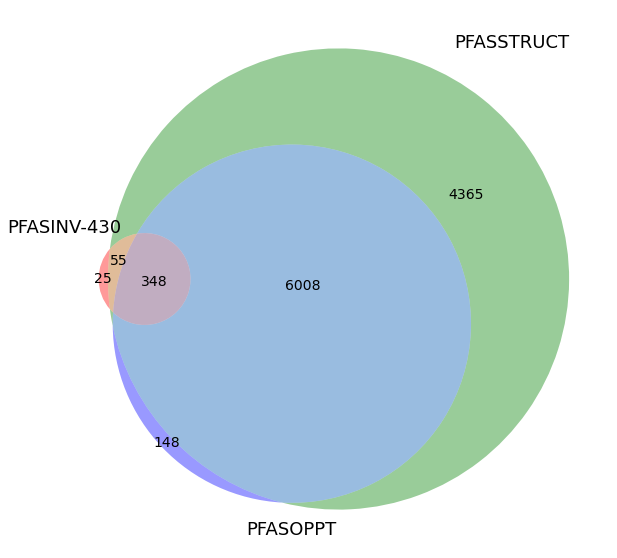

In [32]:
plt.style.use('ggplot')
plt.figure(figsize=(15,10))
v = venn3([set3, set2, set1], ('PFASINV-430', 'PFASSTRUCT', 'PFASOPPT'))
for t in v.set_labels: t.set_fontsize(18)        
label1 = v.get_label_by_id('11') 
label2 = v.get_label_by_id('01')
label3 = v.get_label_by_id('10')
label4 = v.get_label_by_id('111')
label5 = v.get_label_by_id('011')
label6 = v.get_label_by_id('001')
## Those are subset labels (i.e. numbers)
label1.set_fontsize(14)
label2.set_fontsize(14) 
label3.set_fontsize(14) 
label4.set_fontsize(14) 
label5.set_fontsize(14) 
label6.set_fontsize(14)
plt.savefig(figures_dir+'venn_overlaps_080921.png', dpi = 300)